In [2]:
!pip install xgboost

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 660.6 kB/s eta 0:02:31
   ---------------------------------------- 0.0/99.8 MB 487.6 kB/s eta 0:03:25
   ---------------------------------------- 0.1/99.8 MB 655.4 kB/s eta 0:02:33
   ---------------------------------------- 0.1/99.8 MB 774.0 kB/s eta 0:02:09
   ---------------------------------------- 0.2/99.8 MB 748.1 kB/s eta 0:02:14
   ---------------------------------------- 0.2/99.8 MB 808.4 kB/s eta 0:02:04
   ---------------------------------------- 0.2/99.8 MB 752.5 kB/s eta 0:02:13
   ---------------------------------------- 0.3/99.8 MB 770.1 kB/s eta 0:02:10
   ---------------------------------------- 0.3/99.8 MB 776.5 kB/s eta 0:02:09
   -----------

In [10]:
 #Taking Data from sklearn
    
df=pd.read_csv("BostonHousing.csv")
df.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [11]:
#crim: Per capita crime rate by town.
#zn: Proportion of residential land zoned for large lots (over 25,000 sq. ft.).
#indus: Proportion of non-retail business acres per town.
#chas: Charles River dummy variable (1 if tract bounds river; 0 otherwise).
#nox: Nitric oxides concentration (parts per 10 million).
#rm: Average number of rooms per dwelling.
#age: Proportion of owner-occupied units built prior to 1940.
#dis: Weighted distances to five Boston employment centers.
#rad: Index of accessibility to radial highways.
#tax: Full-value property-tax rate per $10,000.

df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
df.shape

(506, 14)

In [14]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

<Axes: >

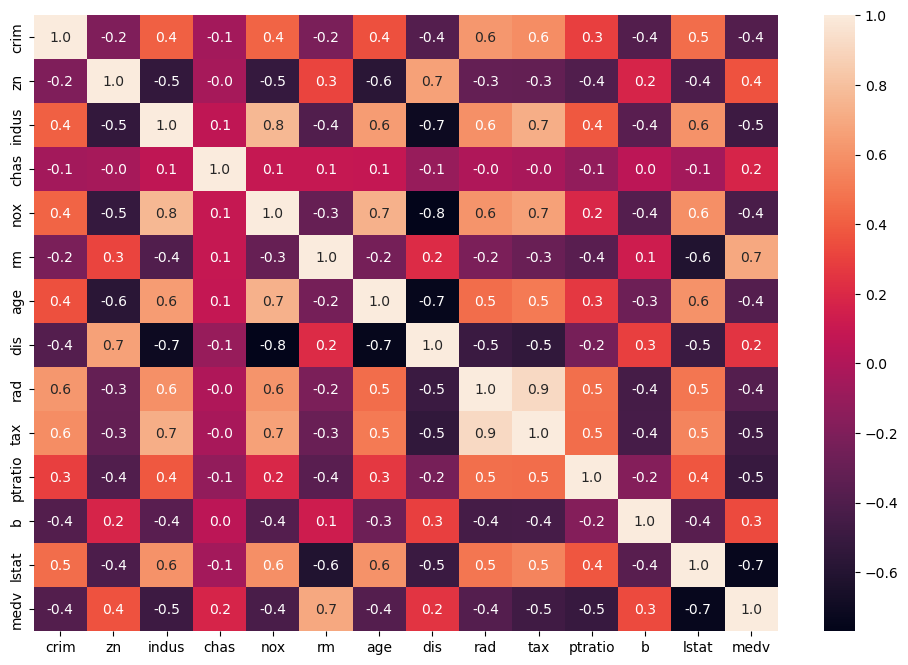

In [22]:
correlation=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation,annot=True,fmt='.1f')

In [24]:
X=df.drop(['medv'],axis=1)
Y=df['medv']
print(X)
print(Y)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

# Train Test Split


In [26]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
print(X_train)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
321  0.18159   0.0   7.38     0  0.493  6.376  54.3  4.5404    5  287   
37   0.08014   0.0   5.96     0  0.499  5.850  41.5  3.9342    5  279   
286  0.01965  80.0   1.76     0  0.385  6.230  31.5  9.0892    1  241   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
25   0.84054   0.0   8.14     0  0.538  5.599  85.7  4.4546    4  307   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
22   1.23247   0.0   8.14     0  0.538  6.142  91.7  3.9769    4  307   
72   0.09164   0.0  10.81     0  0.413  6.065   7.8  5.2873    4  305   
493  0.17331   0.0   9.69     0  0.585  5.707  54.0  2.3817    6  391   
15   0.62739   0.0   8.14     0  0.538  5.834  56.5  4.4986    4  307   
168  2.30040   0.0  19.58     0  0.605  6.319  96.1  2.1000    5  403   

     ptratio       b  lstat  
321     19.6  396.90   6.87  
37      19.2  396.90   8.77  
286     18.2  341.60  12.93  
2  

# Model Training(XGBoost)

In [28]:
#Emsemble Decision Tree Model
model=XGBRegressor()
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [29]:
prediction=model.predict(X_train)
print(prediction)

[23.112196  20.992601  20.10438   34.67932   13.920501  13.499354
 21.998383  15.206723  10.89543   22.67402   13.795236   5.602332
 29.808502  49.98666   34.89634   20.594336  23.388903  19.2118
 32.69294   19.604128  26.978151   8.405952  46.00062   21.70406
 27.084402  19.372278  19.297894  24.79984   22.608278  31.707775
 18.53683    8.703393  17.40025   23.698814  13.29729   10.504759
 12.693588  24.994888  19.694864  14.911037  24.20254   24.991112
 14.901547  16.987965  15.592753  12.704759  24.505623  15.007718
 49.999355  17.509344  21.18844   31.999287  15.606071  22.902134
 19.309835  18.697083  23.302961  37.19767   30.102247  33.117855
 20.993683  50.00471   13.40048    5.002565  16.50862    8.4016905
 28.651423  19.49218   20.595366  45.404697  39.808857  33.4055
 19.81498   33.406376  25.30206   49.998615  12.544487  17.433802
 18.602612  22.601418  50.004013  23.814182  23.313164  23.097467
 41.71243   16.112017  31.604454  36.09397    7.0009975 20.406271
 19.992195  12

In [33]:
#For Classification problem we use Accuracy Score and for Regression we use R square error and Mean Absolute Error

#R squared error
score1=metrics.r2_score(Y_train,prediction)
print(score1)

#Mean Absolute Error
score2=metrics.mean_absolute_error(Y_train,prediction)
print(score2)

0.9999980039471451
0.0091330346494618


In [36]:
test_prediction=model.predict(X_test)

#R squared error
score_1=metrics.r2_score(Y_test,test_prediction)
print(score_1)

#Mean Absolute Error
score_2=metrics.mean_absolute_error(Y_test,test_prediction)
print(score_2)

0.9051721149855378
2.0748727686264927


# Visualizing the actual and predicted data

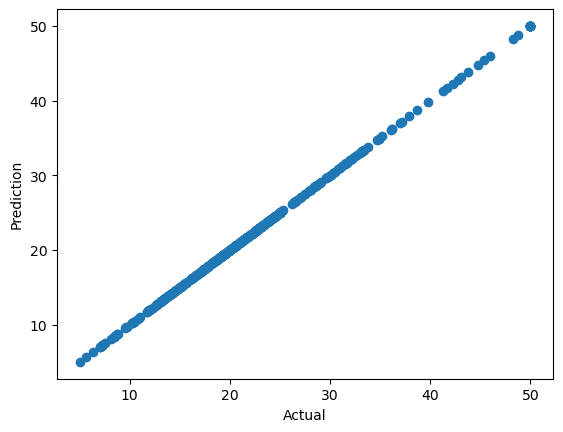

In [39]:
plt.scatter(Y_train,prediction)
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.show()

In [40]:
# 2. Mean Absolute Error (MAE)
#MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It is the average of the absolute differences between predicted and actual values.

# 1. R-squared (R²)
#R-squared, also known as the coefficient of determination, measures the proportion of the variance in the dependent variable that is predictable from the independent variables.

#R-squared (R²): Tells you how well your model explains the variability in the data (goodness of fit).
#Mean Absolute Error (MAE): Tells you how accurate your predictions are on average (prediction accuracy).